# Определение перспективного тарифа для телеком компании

## Оглавление
**[1. Открытие файла с данными и изучение общей информации](#чтение_файла)**
   * [1.1  Данные о звонах (calls.csv)](#чтение_файлов__calls)
   * [1.2  Данные о интернет-сессиях (internet.csv)](#чтение_файлов__internet)
   * [1.3  Данные о сообщениях (messages.csv)](#чтение_файлов__messages)
   * [1.4  Данные о тарифах (tariffs.csv)](#чтение_файлов__tariffs)
   * [1.5  Данные о пользователях (users.csv)](#чтение_файлов__users)
   
**[2. Предобработка данных](#предобработка_данных)**
   * [2.1 Обработка пропущенных значений](#предобработка_данных__обработка_пропущенных_значений)
        * [2.1.1 Обработка нулевых знаечний в data_calls](#предобработка_данных__обработка_пропущенных_значений__обработка_нулевых_знаечний_в_data_calls)
        * [2.1.2 Обработка нулевых знаечний в data_internet](#предобработка_данных__обработка_пропущенных_значений__обработка_нулевых_знаечний_в_data_internet)
   * [2.2 Замена типа данных](#предобработка_данных__замена_типа_данных)
        * [2.2.1 Замена типа данных в data_calls](#предобработка_данных__замена_типа_данных__замена_типа_данных_в_data_calls)
        * [2.2.2 Замена типа данных в data_internet](#предобработка_данных__замена_типа_данных__замена_типа_данных_в_data_internet)
        * [2.2.3 Замена типа данных в data_messages](#предобработка_данных__замена_типа_данных__замена_типа_данных_в_data_messages)
        * [2.2.4 Замена типа данных в data_users](#предобработка_данных__замена_типа_данных__замена_типа_данных_в_data_users)
   * [2.3 Объединение необходимых данных в таблицу](#предобработка_данных__объединение_необходимых_данных_в_таблицу)
   * [2.4 Расчет помесячной выручки с каждого пользователя](#предобработка_данных__расчет_помесячной_выручки_с_каждого_пользователя)
   
**[3. Анализ данных](#анализ_данных)**
   * [3.1 Анализ использованных минут](#анализ_данных__анализ_потраченных_минут)
   * [3.2 Анализ использованного интернет-трафика](#анализ_данных__анализ_использованного_интернет_трафика)
   * [3.3 Анализ отправленных сообщений](#анализ_данных__анализ_отпарвленных_сообщений)
   * [3.4 Анализ выручки](#анализ_данных__анализ_выручки)
   
**[4. Проверка гипотез](#проверка_гипотез)**
   * [4.1 Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается](#проверка_гипотез__средняя_выручка_пользователей_тарифов_«Ультра»_и_«Смарт»_различается)
   * [4.2 Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов](#проверка_гипотез__средняя_выручка_пользователей_из_Москвы_отличается_от_выручки_пользователей_из_других_регионов)
   
**[5. Общий вывод](#общий_вывод)**

## 1. Открытие файла с данными и изучение общей информации. <a id="чтение_файлов"></a>

## 1.1 Данные о звонах (calls.csv)<a id="чтение_файлов__calls"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats as st

In [2]:
data_calls = pd.read_csv()

def information(DataFrame):
    display(DataFrame.head(10))
    display(DataFrame.info())
    display(DataFrame.describe())
    print('Количество дубликатов в DataFrame:', DataFrame.duplicated().sum())
    
information(data_calls)    

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


Количество дубликатов в DataFrame: 0


DataFrame содержит информацию о 202607 совершенных звонков. Пропущенных значений нет. Дубликатов нет. Неоходимые изменения:
 * столбец ***duration***. Округлить все значения до целого значения в болушую сторону (нулевые значения заменить на 1), так как у оператора применяется поминутная тарификация и затем изменить тип данных столбца на int;
 * столбец ***call_date***. Изменить тип данных на datetime.

## 1.2 Данные о интернет-сессиях (internet.csv)<a id="чтение_файлов__internet"></a>

In [3]:
data_internet = pd.read_csv()

information(data_internet)   

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


Количество дубликатов в DataFrame: 0


DataFrame содержит информацию о 149396 интернет-сессий. Пропущенных значений нет. Дубликатов нет. Неоходимые изменения:
 * столбец ***mb_used***. Округлить все значения до целого значения в болушую сторону (нулевые значения заменить на 1), так как у оператора применяется помегабайтная тарификация и затем изменить тип данных столбца на int;
 * столбец ***session_date***. Изменить тип данных на datetime.

## 1.3 Данные о сообщениях (messages.csv)<a id="чтение_файлов__messages"></a>

In [4]:
data_messages = pd.read_csv()

information(data_messages)  

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


Количество дубликатов в DataFrame: 0


DataFrame содержит информацию о 123036 отправленных сообщений. Пропущенных значений нет. Дубликатов нет. Неоходимые изменения:
 * столбец ***message_date***. Изменить тип данных на datetime.

## 1.4 Данные о тарифах (tariffs.csv)<a id="чтение_файлов__tariffs"></a>

In [5]:
data_tariffs = pd.read_csv()

information(data_tariffs) 

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


Количество дубликатов в DataFrame: 0


DataFrame содержит информацию о 2-х тарифах. Данный DataFrame оставим без изменений.

## 1.5 Данные о пользователях (users.csv)<a id="чтение_файлов__users"></a>

In [6]:
data_users = pd.read_csv()

information(data_users) 

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


Количество дубликатов в DataFrame: 0


DataFrame содержит информацию о 500 пользователей. Пропущенных значений нет. Дубликатов нет. Неоходимые изменения:
 * столбцы ***churn_date, reg_date***. Изменить тип данных на datetime.

### Выводы

Изучили общую инфомрацию о предоставленных данных. Проверили наличие пропущенных значений и дубликатов. Необходимы следующие изменения:
* DataFrame ***data_calls***:
 * столбец *duration*. Округлить все значения до целого значения в болушую сторону (нулевые значения заменить на 1), так как у оператора применяется поминутная тарификация и затем изменить тип данных столбца на int;
 * столбец *call_date*. Изменить тип данных на datetime.
* DataFrame ***data_internet***:
 * столбец *mb_used*. Округлить все значения до целого значения в болушую сторону (нулевые значения заменить на 1), так как у оператора применяется помегабайтная тарификация и затем изменить тип данных столбца на int;
 * столбец *session_date*. Изменить тип данных на datetime.
* DataFrame ***data_messages***: 
 * столбец *message_date*. Изменить тип данных на datetime.
* DataFrame ***data_users***:
 * столбцы *churn_date, reg_date*. Изменить тип данных на datetime.

## 2. Предобработка данных<a id="предобработка_данных"></a>

## 2.1 Обработка пропущенных значений<a id="предобработка_данных__обработка_пропущенных_значений"></a>

### 2.1.1 Обработка нулевых знаечний в data_calls<a id="предобработка_данных__обработка_пропущенных_значений__обработка_нулевых_знаечний_в_data_calls"></a>

Посчитаем количество нулевых значений в столбце ***duration***.

In [7]:
print('Количество звонков с длительностью 0: ', len(data_calls.query('duration == 0')))

Количество звонков с длительностью 0:  39613


В условиях сказано, что оператор всегда округляет совершенные звонки до 1 минуты. Поэтому заменим нулевые значения на 1.

In [8]:
data_calls['duration'].replace(0,1, inplace=True)

Проверим количество звонкиов с длительностью 0 после замены.

In [9]:
print('Количество звонков с длительностью 0: ', len(data_calls.query('duration == 0')))

Количество звонков с длительностью 0:  0


### 2.1.2 Обработка нулевых знаечний в data_internet<a id="предобработка_данных__обработка_пропущенных_значений__обработка_нулевых_знаечний_в_data_internet"></a>

Посчитаем количество нулевых значений в столбце ***mb_used***.

In [10]:
print('Количество звонков с длительностью 0: ', len(data_internet.query('mb_used == 0')))

Количество звонков с длительностью 0:  19598


В условиях сказано, что оператор всегда округляет совершенные интернет-сессии до 1 Мб. Поэтому заменим нулевые значения на 1.

In [11]:
data_internet['mb_used'].replace(0,1, inplace=True)

Проверим количество звонкиов с длительностью 0 после замены.

In [12]:
print('Количество звонков с длительностью 0: ', len(data_internet.query('mb_used == 0')))

Количество звонков с длительностью 0:  0


## 2.2 Замена типа данных<a id="предобработка_данных__замена_типа_данных"></a>

### 2.2.1 Замена типа данных в data_calls<a id="предобработка_данных__замена_типа_данных__замена_типа_данных_в_data_calls"></a>

Округлим все значения в столбце ***duration*** до минут в большую сторону и заменим тип данных на int.

In [13]:
data_calls['duration'] = data_calls['duration'].apply(np.ceil).astype(int)

Изменим тип данных для столбца ***call_date*** на datetime.

In [14]:
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format='%Y-%m-%d')

Добавим столбец с номером месяца.

In [15]:
data_calls['date_month'] = data_calls['call_date'].dt.month

Проверим, что изменения произошли.

In [16]:
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
id            202607 non-null object
call_date     202607 non-null datetime64[ns]
duration      202607 non-null int64
user_id       202607 non-null int64
date_month    202607 non-null int64
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 7.7+ MB


### 2.2.2 Замена типа данных в data_internet<a id="предобработка_данных__замена_типа_данных__замена_типа_данных_в_data_internet"></a>

Округлим все значения в столбце ***mb_used*** до мегабайт в большую сторону и заменим тип данных на int.

In [17]:
data_internet['mb_used'] = data_internet['mb_used'].apply(np.ceil).astype(int)

Изменим тип данных для столбца ***call_date*** на datetime.

In [18]:
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format='%Y-%m-%d')

Добавим столбец с номером месяца.

In [19]:
data_internet['date_month'] = data_internet['session_date'].dt.month

Проверим, что изменения произошли.

In [20]:
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 6 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null int64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
date_month      149396 non-null int64
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 6.8+ MB


### 2.2.3 Замена типа данных в data_messages<a id="предобработка_данных__замена_типа_данных__замена_типа_данных_в_data_messages"></a>

Изменим тип данных для столбца ***message_date*** на datetime.

In [21]:
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'], format='%Y-%m-%d')

Добавим столбец с номером месяца.

In [22]:
data_messages['date_month'] = data_messages['message_date'].dt.month

Проверим, что изменения произошли.

In [23]:
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 4 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
date_month      123036 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.8+ MB


### 2.2.4 Замена типа данных в data_users<a id="предобработка_данных__замена_типа_данных__замена_типа_данных_в_data_users"></a>

Изменим тип данных для столбцов ***churn_date*** и ***reg_date*** на datetime.

In [24]:
data_users['churn_date'] = pd.to_datetime(data_users['churn_date'], format='%Y-%m-%d')
data_users['reg_date'] = pd.to_datetime(data_users['reg_date'], format='%Y-%m-%d')

Проверим, что изменения произошли.

In [25]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


## 2.3 Объединение необходимых данных в таблицу<a id="предобработка_данных__объединение_необходимых_данных_в_таблицу"></a>

Посчитаем для каждого пользователя количество сделанных звонков и израсходованных минут разговора по месяцам.

In [26]:
data_calls_stat = data_calls.pivot_table(index = ['user_id','date_month'], values = 'duration', aggfunc = {'count', 'sum'})
data_calls_stat.head(10)

count  sum
user_id date_month            
1000    5              22  164
        6              43  187
        7              47  346
        8              52  418
        9              58  478
        10             57  363
        11             43  344
        12             46  341
1001    11             59  444
        12             63  430

Посчитаем для каждого пользователя количество отправленных сообщений по месяцам.

In [27]:
data_messages_stat = data_messages.pivot_table(index = ['user_id','date_month'], values = 'id', aggfunc = {'count'})
data_messages_stat.head(10)

count
user_id date_month       
1000    5              22
        6              60
        7              75
        8              81
        9              57
        10             73
        11             58
        12             70
1002    6               4
        7              11

Посчитаем для каждого пользователя объем израсходованного интернет-трафика по месяцам.

In [28]:
data_internet_stat = data_internet.pivot_table(index = ['user_id','date_month'], values = 'mb_used', aggfunc = {'sum'})
data_internet_stat.head(10)

sum
user_id date_month       
1000    5            2257
        6           23262
        7           14017
        8           14072
        9           14583
        10          14717
        11          14769
        12           9829
1001    11          18460
        12          14059

В новый DataFrame добавим информацию для каждого пользователя о суммарных звонках, суммарном интернет трафике и количестве сообщений за каждый месяц. Переименуем столбцы и выведем первые 10 строк.

In [29]:
data_final = pd.merge(data_calls_stat, data_internet_stat, on=['user_id', 'date_month'], how='outer')
data_final = pd.merge(data_final, data_messages_stat, on=['user_id', 'date_month'], how='outer').reset_index() 
data_final = data_final.rename(columns={'count_x': 'calls_count', 'sum_x': 'calls_sum', 'sum_y': 'internet_sum', 'count_y': 'messages_sum'})
data_final.head(10)

,user_id,date_month,calls_count,calls_sum,internet_sum,messages_sum
0,1000,5,22.0,164.0,2257.0,22.0
1,1000,6,43.0,187.0,23262.0,60.0
2,1000,7,47.0,346.0,14017.0,75.0
3,1000,8,52.0,418.0,14072.0,81.0
4,1000,9,58.0,478.0,14583.0,57.0
5,1000,10,57.0,363.0,14717.0,73.0
6,1000,11,43.0,344.0,14769.0,58.0
7,1000,12,46.0,341.0,9829.0,70.0
8,1001,11,59.0,444.0,18460.0,NaN
9,1001,12,63.0,430.0,14059.0,NaN


Также добавим в ***data_final*** информацию о том из какого города клиент и каким тарифом он пользуется.

In [30]:
data_final = pd.merge(data_final, data_users[['user_id', 'tariff', 'city']], on='user_id')

Проверим, что никакого клиента мы не потеряли...

In [31]:
print('Количество клиентов: ',len(data_users['user_id'].unique()))

Количество клиентов:  500


Посмотрим информаицю о DataFrame.

In [32]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 8 columns):
user_id         3214 non-null int64
date_month      3214 non-null int64
calls_count     3174 non-null float64
calls_sum       3174 non-null float64
internet_sum    3203 non-null float64
messages_sum    2717 non-null float64
tariff          3214 non-null object
city            3214 non-null object
dtypes: float64(4), int64(2), object(2)
memory usage: 226.0+ KB


Есть пропущенные значения. Они возникли из-за того, что в некоторые месяцы клиенты могли не пользоваться звонками, интернетом или сообщениями. Поэтому заменим пропущенные значения на 0.

In [33]:
data_final = data_final.fillna(0)

Заменим для столбцов ***calls_count, calls_sum, internet_sum, messages_sum*** тип данных на int.

In [34]:
data_final['calls_count'] = data_final['calls_count'].astype(int)
data_final['calls_sum'] = data_final['calls_sum'].astype(int)
data_final['internet_sum'] = data_final['internet_sum'].astype(int)
data_final['messages_sum'] = data_final['messages_sum'].astype(int)

## 2.4 Расчет помесячной выручки с каждого пользователя<a id="предобработка_данных__расчет_помесячной_выручки_с_каждого_пользователя"></a>

Напишем функцию, которая позволит рассчитать помесячную выручку с каждого пользователя и применем ее к нашему DataFrame.

In [35]:
def coast(row):
    debug = False
    
    tariff_name = row['tariff']
    calls = row['calls_sum']
    internet = row['internet_sum']
    messages = row['messages_sum']
    
    tariff = data_tariffs.query('tariff_name == @tariff_name').reset_index()
    
    calls_coast = 0
    if (calls - tariff.loc[0, 'minutes_included']) > 0:
        calls_coast = (calls - tariff.loc[0, 'minutes_included']) * tariff.loc[0, 'rub_per_minute']
    if debug: print(calls_coast)
    
    messages_coast = 0
    if (messages - tariff.loc[0, 'messages_included']) > 0:
        messages_coast = (messages - tariff.loc[0, 'messages_included']) * tariff.loc[0, 'rub_per_message']
    if debug: print(messages_coast)
        
    internet_coast = 0
    if (internet - tariff.loc[0, 'mb_per_month_included']) > 0:
        internet_coast = np.ceil((internet - tariff.loc[0, 'mb_per_month_included']) / 1024) * tariff.loc[0, 'rub_per_gb']
    if debug: print(internet_coast)
        
    return tariff.loc[0, 'rub_monthly_fee'] + calls_coast + messages_coast + internet_coast
    

In [36]:
data_final['coast'] = data_final.apply(coast, axis = 1)
data_final.head(10)

,user_id,date_month,calls_count,calls_sum,internet_sum,messages_sum,tariff,city,coast
0,1000,5,22,164,2257,22,ultra,Краснодар,1950.0
1,1000,6,43,187,23262,60,ultra,Краснодар,1950.0
2,1000,7,47,346,14017,75,ultra,Краснодар,1950.0
3,1000,8,52,418,14072,81,ultra,Краснодар,1950.0
4,1000,9,58,478,14583,57,ultra,Краснодар,1950.0
5,1000,10,57,363,14717,73,ultra,Краснодар,1950.0
6,1000,11,43,344,14769,58,ultra,Краснодар,1950.0
7,1000,12,46,341,9829,70,ultra,Краснодар,1950.0
8,1001,11,59,444,18460,0,smart,Москва,1350.0
9,1001,12,63,430,14059,0,smart,Москва,550.0


### Выводы

* Обработали нулевые значения в столбцах ***data_calls*** и ***data_internet***;
* Заменили тип данных в столбцах ***call_date, session_date, message_date, churn_date*** и ***reg_date*** на datetime;
* Значения в столбцах ***duration, mb_used*** округлили в большую сторону до ближайщего целого и заменили тип данных в этих столбцах на int;
* Расчитали количество использованных минут, интернет-трафика и отправленных сообщения за каждый месяц для каждого клиента;
* Расчитали траты каждого клиента за услуги связи за каждый месяц.

## 3. Анализ данных<a id="анализ_данных"></a>

Рассчитаем средние значения потраченных минут, интернет-трафика, сообщений и прибыли по месяцам для каждого тарифа.

In [37]:
data_mean = data_final.pivot_table(index = 'date_month', columns = 'tariff', values = ['calls_sum', 'internet_sum', 'messages_sum', 'coast'])
data_mean

calls_sum                    coast               internet_sum  \
tariff           smart       ultra        smart        ultra         smart   
date_month                                                                   
1           209.647059  440.888889   723.352941  1950.000000   8528.588235   
2           306.310345  304.666667   835.051724  1975.000000  11617.344828   
3           400.532468  503.081081  1178.571429  2014.864865  15131.207792   
4           377.000000  470.072727   974.875000  2001.818182  13486.080357   
5           398.404255  524.865672  1219.106383  2061.940299  15832.751773   
6           406.701220  492.428571  1224.146341  2041.071429  15822.445122   
7           419.288557  560.296703  1246.472637  2121.428571  15771.398010   
8           433.191489  524.570093  1346.974468  2083.177570  16640.212766   
9           440.080769  553.643478  1274.500000  2024.347826  16332.615385   
10          438.295918  572.829268  1388.833333  2067.073171  16786.853741   
11          447.620253  555.805970  1366.996835  2093.283582  16925.962025   
12          491.418398  609.129496  1606.038576  2138.848921  18145.824926   

                         messages_sum             
tariff             ultra        smart      ultra  
date_month                                        
1           13154.666667    18.235294  33.777778  
2           11788.333333    24.086207  21.958333  
3           17553.513514    31.857143  32.297297  
4           16845.254545    30.741071  31.563636  
5           19383.194030    33.773050  37.850746  
6           18943.928571    33.402439  41.726190  
7           20516.571429    33.751244  49.846154  
8           19595.878505    33.638298  48.439252  
9           19224.043478    33.638462  52.286957  
10          20065.536585    33.765306  58.430894  
11          19807.126866    34.075949  55.791045  
12          21815.683453    35.994065  60.611511

## 3.1 Анализ использованных минут<a id="анализ_данных__анализ_потраченных_минут"></a>

Построим столбчатую диаграмму для calls_sum.

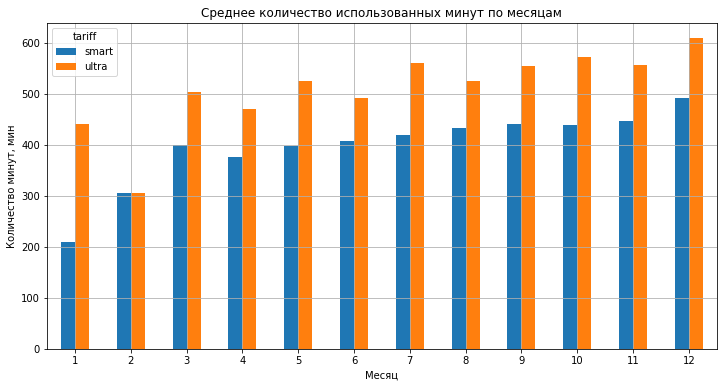

In [38]:
data_mean['calls_sum'].plot(kind = 'bar', grid=True, legend=True, figsize = (12,6), rot = 0)
plt.title('Среднее количество использованных минут по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество минут, мин')
plt.show()

По графику видно, что в среднем пользователи тарифа "smart" используют меньше минут в месяц, чем пользователи тарифа "ultra". Еще одна интересная тенденция, что количество использованных минут для обоих тарифов увеличивается в течении года и достигает максимума к декабрю.

Посчитаем медиану, среднее значение, дисперсию и стандартное отклонение для обоих тарифов.

In [39]:
for tariff in ['smart', 'ultra']:
    print('Медиана для тарифа "{:}" составляет: {:.0f}'.format(tariff, np.median(data_final.query('tariff == @tariff')['calls_sum'])))
    print('Среднее значение для тарифа "{:}" составляет: {:.0f}'.format(tariff, np.mean(data_final.query('tariff == @tariff')['calls_sum'])))
    print('Дисперсия для тарифа "{:}" составляет: {:.0f}'.format(tariff, np.var(data_final.query('tariff == @tariff')['calls_sum'], ddof=1)))
    print('Стандартное отклонение для тарифа "{:}" составляет: {:.0f}'.format(tariff, np.std(data_final.query('tariff == @tariff')['calls_sum'], ddof=1)))
    print()

Медиана для тарифа "smart" составляет: 435
Среднее значение для тарифа "smart" составляет: 429
Дисперсия для тарифа "smart" составляет: 37975
Стандартное отклонение для тарифа "smart" составляет: 195

Медиана для тарифа "ultra" составляет: 532
Среднее значение для тарифа "ultra" составляет: 541
Дисперсия для тарифа "ultra" составляет: 106106
Стандартное отклонение для тарифа "ultra" составляет: 326



Также для визуального анализа построим гистограмму и диаграмму размаха.

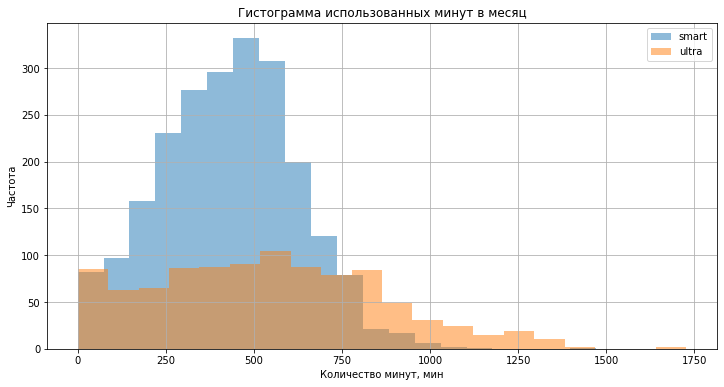

In [40]:
ax = data_final[data_final['tariff'] == 'smart']['calls_sum'].hist(alpha = .5, bins = 20, figsize = (12,6))
data_final[data_final['tariff'] == 'ultra']['calls_sum'].hist(ax = ax, alpha = .5, bins = 20)
plt.legend(['smart', 'ultra'])
plt.title('Гистограмма использованных минут в месяц')
plt.xlabel('Количество минут, мин')
plt.ylabel('Частота')
plt.show()

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


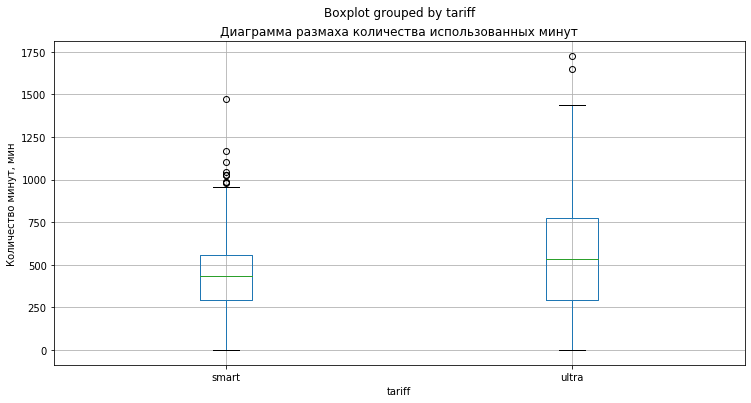

In [41]:
data_final.boxplot(column='calls_sum', by='tariff', figsize = (12, 6))
plt.title('Диаграмма размаха количества использованных минут')
plt.ylabel('Количество минут, мин')
plt.show()

В среднем пользователи тарифа "smart" тратят меньше минут, чем пользователи тарифа "ultra". Стандартное отклонение намного больше у пользователей тарифа "ultra". По гистограмме видно большой разброс потраченных минут для пользователей тарифа "ultra". По диаграмме размаха видно, что количество выбросов для тарифа "smart" намного больше, чем для тарифа "ultra".

## 3.2 Анализ использованного интернет-трафика<a id="анализ_данных__анализ_использованного_интернет_трафика"></a>

Построим столбчатую диаграмму для internet_sum.

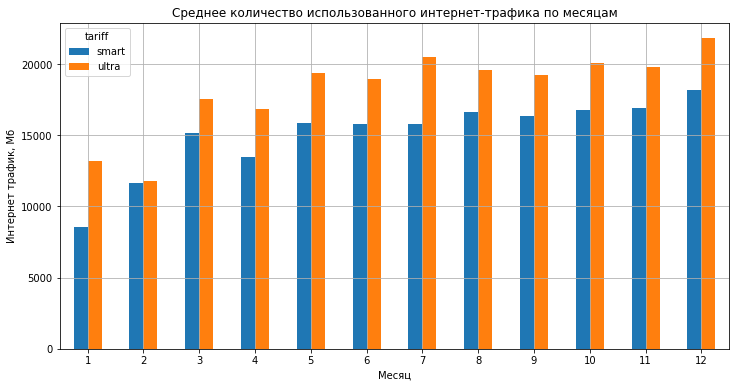

In [42]:
data_mean['internet_sum'].plot(kind = 'bar', grid=True, legend=True, figsize = (12,6), rot = 0)
plt.title('Среднее количество использованного интернет-трафика по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Интернет трафик, Мб')
plt.show()

По графику видно, что в среднем пользователи тарифа "smart" используют меньше интернет-тарифка в месяц, чем пользователи тарифа "ultra". Еще одна интересная тенденция, что количество использованного интернет-трафика, как и использованных минут, для обоих тарифов увеличивается в течении года и достигает максимума к декабрю.

Посчитаем медиану, среднее значение, дисперсию и стандартное отклонение для обоих тарифов.

In [43]:
for tariff in ['smart', 'ultra']:
    print('Медиана для тарифа "{:}" составляет: {:.0f}'.format(tariff, np.median(data_final.query('tariff == @tariff')['internet_sum'])))
    print('Среднее значение для тарифа "{:}" составляет: {:.0f}'.format(tariff, np.mean(data_final.query('tariff == @tariff')['internet_sum'])))
    print('Дисперсия для тарифа "{:}" составляет: {:.0f}'.format(tariff, np.var(data_final.query('tariff == @tariff')['internet_sum'], ddof=1)))
    print('Стандартное отклонение для тарифа "{:}" составляет: {:.0f}'.format(tariff, np.std(data_final.query('tariff == @tariff')['internet_sum'], ddof=1)))
    print()

Медиана для тарифа "smart" составляет: 16540
Среднее значение для тарифа "smart" составляет: 16237
Дисперсия для тарифа "smart" составляет: 34571991
Стандартное отклонение для тарифа "smart" составляет: 5880

Медиана для тарифа "ultra" составляет: 19324
Среднее значение для тарифа "ultra" составляет: 19489
Дисперсия для тарифа "ultra" составляет: 101951581
Стандартное отклонение для тарифа "ultra" составляет: 10097



Также для визуального анализа построим гистограмму и диаграмму размаха.

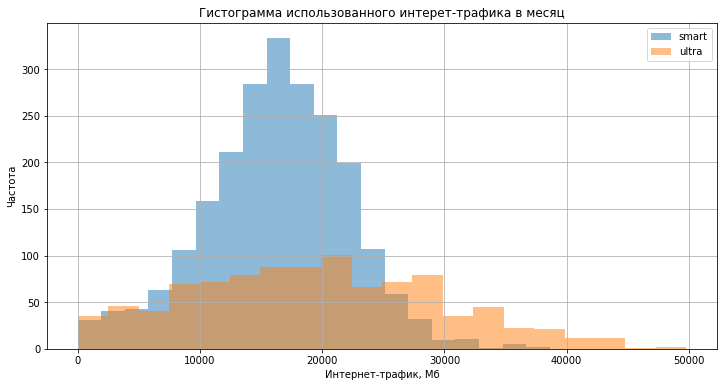

In [44]:
ax = data_final[data_final['tariff'] == 'smart']['internet_sum'].hist(alpha = .5, bins = 20, figsize = (12,6))
data_final[data_final['tariff'] == 'ultra']['internet_sum'].hist(ax = ax, alpha = .5, bins = 20)
plt.legend(['smart', 'ultra'])
plt.title('Гистограмма использованного интерет-трафика в месяц')
plt.xlabel('Интернет-трафик, Мб')
plt.ylabel('Частота')
plt.show()

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


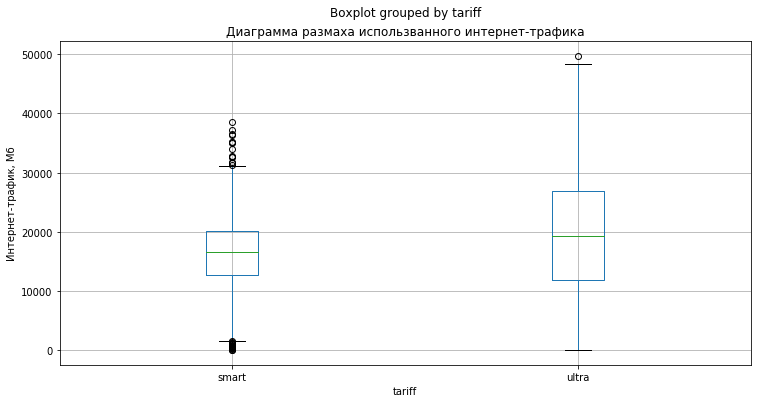

In [45]:
data_final.boxplot(column='internet_sum', by='tariff', figsize = (12, 6))
plt.title('Диаграмма размаха использванного интернет-трафика')
plt.ylabel('Интернет-трафик, Мб')
plt.show()

В среднем пользователи тарифа "smart" используют меньше интернет-трафика, чем пользователи тарифа "ultra". Стандартное отклонение почти в два раза больше у пользователей тарифа "ultra", чем у пользователей тарифа "smart". По гистограмме видно большой разброс использованного интернет-трафика для пользователей тарифа "ultra". По диаграмме размаха видно, что количество выбросов для тарифа "smart" намного больше, чем для тарифа "ultra".

## 3.3 Анализ отправленных сообщений<a id="анализ_данных__анализ_отпарвленных_сообщений"></a>

Построим столбчатую диаграмму для messages_sum.

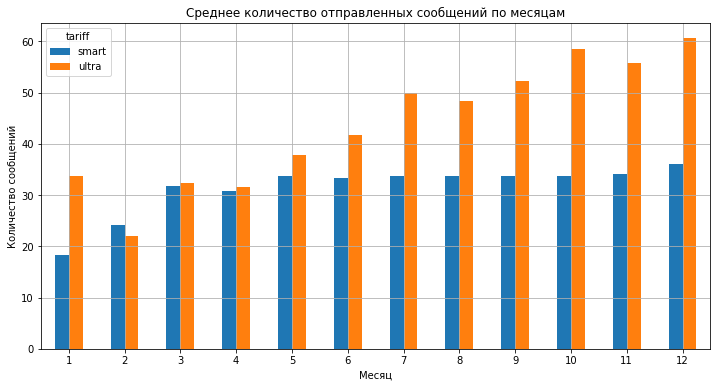

In [46]:
data_mean['messages_sum'].plot(kind = 'bar', grid=True, legend=True, figsize = (12,6), rot = 0)
plt.title('Среднее количество отправленных сообщений по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество сообщений')
plt.show()

По графику видно, что в среднем пользователи тарифа "smart" отправляют меньше сообщений в месяц, чем пользователи тарифа "ultra". Еще одна интересная тенденция, что количество отправленных сообщений для тарифа "ultra" увеличивается в течении года и достигает максимума к декабрю.

Посчитаем медиану, среднее значение, дисперсию и стандартное отклонение для обоих тарифов.

In [47]:
for tariff in ['smart', 'ultra']:
    print('Медиана для тарифа "{:}" составляет: {:.0f}'.format(tariff, np.median(data_final.query('tariff == @tariff')['messages_sum'])))
    print('Среднее значение для тарифа "{:}" составляет: {:.0f}'.format(tariff, np.mean(data_final.query('tariff == @tariff')['messages_sum'])))
    print('Дисперсия для тарифа "{:}" составляет: {:.0f}'.format(tariff, np.var(data_final.query('tariff == @tariff')['messages_sum'], ddof=1)))
    print('Стандартное отклонение для тарифа "{:}" составляет: {:.0f}'.format(tariff, np.std(data_final.query('tariff == @tariff')['messages_sum'], ddof=1)))
    print()

Медиана для тарифа "smart" составляет: 28
Среднее значение для тарифа "smart" составляет: 33
Дисперсия для тарифа "smart" составляет: 797
Стандартное отклонение для тарифа "smart" составляет: 28

Медиана для тарифа "ultra" составляет: 38
Среднее значение для тарифа "ultra" составляет: 49
Дисперсия для тарифа "ultra" составляет: 2285
Стандартное отклонение для тарифа "ultra" составляет: 48



Также для визуального анализа построим гистограмму и диаграмму размаха.

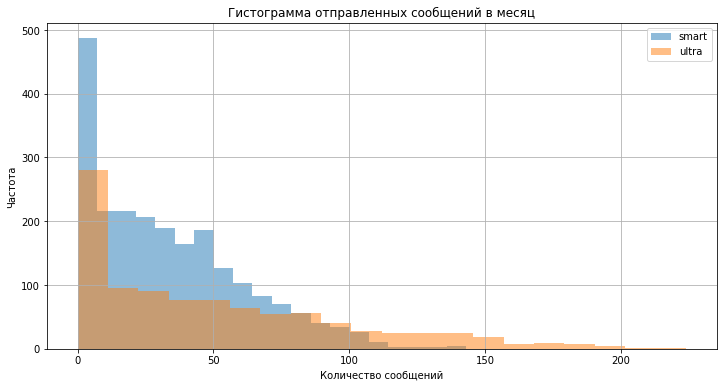

In [48]:
ax = data_final[data_final['tariff'] == 'smart']['messages_sum'].hist(alpha = .5, bins = 20, figsize = (12,6))
data_final[data_final['tariff'] == 'ultra']['messages_sum'].hist(ax = ax, alpha = .5, bins = 20)
plt.legend(['smart', 'ultra'])
plt.title('Гистограмма отправленных сообщений в месяц')
plt.xlabel('Количество сообщений')
plt.ylabel('Частота')
plt.show()

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


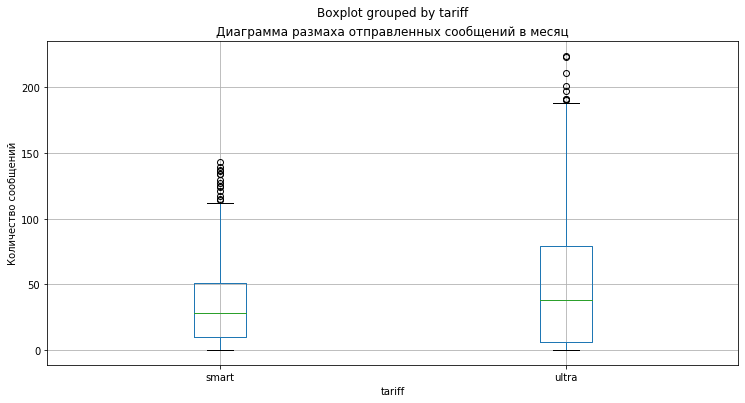

In [49]:
data_final.boxplot(column='messages_sum', by='tariff', figsize = (12, 6))
plt.title('Диаграмма размаха отправленных сообщений в месяц')
plt.ylabel('Количество сообщений')
plt.show()

В среднем пользователи тарифа "smart" отправляют меньше сообщений, чем пользователи тарифа "ultra". Стандартное отклонение почти в два раза больше у пользователей тарифа "ultra", чем у пользователей тарифа "smart". По гистограмме видно большой разброс отправленных сообщений для пользователей тарифа "ultra", также видно, что многие пользователи обоих тарифов не отправляют сообщения. По диаграмме размаха видно, что количество выбросов для тарифа "smart" намного больше, чем для тарифа "ultra".

## 3.4 Анализ выручки<a id="анализ_данных__анализ_выручки"></a>

Построим столбчатую диаграмму для coast.

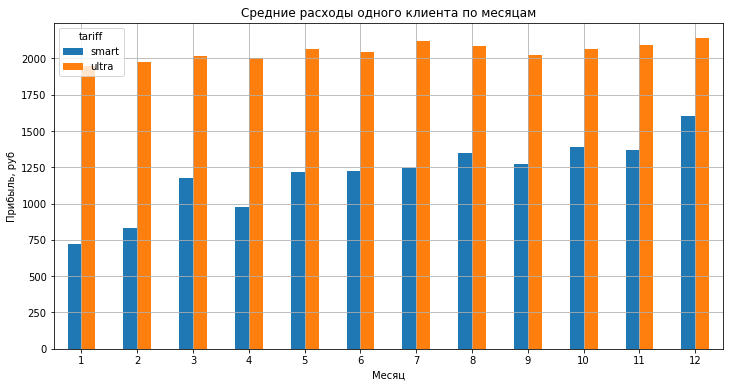

In [50]:
data_mean['coast'].plot(kind = 'bar', grid=True, legend=True, figsize = (12,6), rot = 0)
plt.title('Средние расходы одного клиента по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Прибыль, руб')
plt.show()

По гарфику видно, что клинты, использующие тариф "ultra" в среднем тратили практически одинаковое количество денег за каждый месяц. Также видно, что помимо абоненской платы (1950 руб.) они немного тратили на дополнительные услуги. А вот клиенты, использующие тариф "smart" очень неравномерно тратили деньги за услуги связи в течении года. Также помимо абоненской платы (550 руб.) клиенты тарифа "smart" очень много тратят на дополнительные услуги. Видимо им не хватает минут, интернета и сообщений, которые включены в тариф.

Посчитаем медиану, среднее значение, дисперсию и стандартное отклонение для обоих тарифов.

In [51]:
for tariff in ['smart', 'ultra']:
    print('Медиана для тарифа "{:}" составляет: {:.0f}'.format(tariff, np.median(data_final.query('tariff == @tariff')['coast'])))
    print('Среднее значение для тарифа "{:}" составляет: {:.0f}'.format(tariff, np.mean(data_final.query('tariff == @tariff')['coast'])))
    print('Дисперсия для тарифа "{:}" составляет: {:.0f}'.format(tariff, np.var(data_final.query('tariff == @tariff')['coast'], ddof=1)))
    print('Стандартное отклонение для тарифа "{:}" составляет: {:.0f}'.format(tariff, np.std(data_final.query('tariff == @tariff')['coast'], ddof=1)))
    print()

Медиана для тарифа "smart" составляет: 1075
Среднее значение для тарифа "smart" составляет: 1313
Дисперсия для тарифа "smart" составляет: 690458
Стандартное отклонение для тарифа "smart" составляет: 831

Медиана для тарифа "ultra" составляет: 1950
Среднее значение для тарифа "ultra" составляет: 2071
Дисперсия для тарифа "ultra" составляет: 143491
Стандартное отклонение для тарифа "ultra" составляет: 379



Также для визуального анализа построим гистограмму и диаграмму размаха.

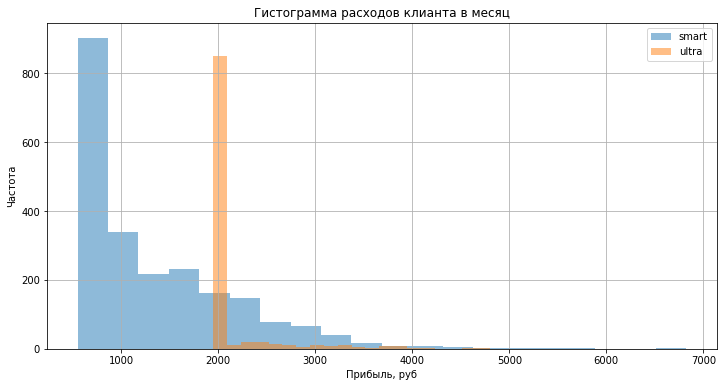

In [52]:
ax = data_final[data_final['tariff'] == 'smart']['coast'].hist(alpha = .5, bins = 20, figsize = (12,6))
data_final[data_final['tariff'] == 'ultra']['coast'].hist(ax = ax, alpha = .5, bins = 20)
plt.legend(['smart', 'ultra'])
plt.title('Гистограмма расходов клианта в месяц')
plt.xlabel('Прибыль, руб')
plt.ylabel('Частота')
plt.show()

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


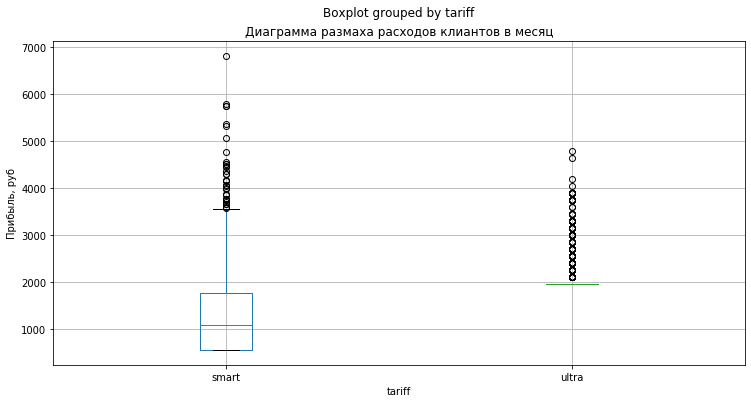

In [53]:
data_final.boxplot(column='coast', by='tariff', figsize = (12, 6))
plt.title('Диаграмма размаха расходов клиантов в месяц')
plt.ylabel('Прибыль, руб')
plt.show()

По гистограмме видно очень большой размах у клиентов тарифа "smart", среднее значение составляет 1313, что в более, чем в 2 раза выше абоненсокй платы по тарифу, также значение стандартного отклонения равное 831, говорит о большом разбросе значений. Клиентам же тарифа "ultra" практически всегда хватает включенных в тариф минут, интернета и сообщений, так как гистаграмме и диаграмме размаха видно, что в основном все значения равняются 1950. Это подтверждается и средним значением равным 2071 и небольшим стандартным отклонением, которое составляет 379.

Посчитаем сколько за год принесли денег фирме клиенты разных тарифов.

In [54]:
coast_smart = data_final.query('tariff == "smart"')['coast'].sum()
coast_ultra = data_final.query('tariff == "ultra"')['coast'].sum()
print('Приыбль за год с клиентов, пользующиеся тарифом "smart": {:.0f} рублей'.format(coast_smart))
print('Приыбль за год с клиентов, пользующиеся тарифом "ultra": {:.0f} рублей'.format(coast_ultra))

Приыбль за год с клиентов, пользующиеся тарифом "smart": 2925590 рублей
Приыбль за год с клиентов, пользующиеся тарифом "ultra": 2040000 рублей


In [55]:
coast_smart_percent = coast_smart / (coast_smart + coast_ultra) * 100
coast_ultra_percent = coast_ultra / (coast_smart + coast_ultra) * 100
print('Доля приыбыли за год с клиентов, пользующиеся тарифом "smart": {:.1f} %'.format(coast_smart_percent))
print('Доля приыбыли за год с клиентов, пользующиеся тарифом "ultra": {:.1f} %'.format(coast_ultra_percent))

Доля приыбыли за год с клиентов, пользующиеся тарифом "smart": 58.9 %
Доля приыбыли за год с клиентов, пользующиеся тарифом "ultra": 41.1 %


Тариф "smart" приносит больше прибыли компании, чем тариф "ultra". 

Посмотрим сколько людей пользуются исследуемыми тарифами.

In [56]:
data_users['tariff'].value_counts()

smart    351
ultra    149
Name: tariff, dtype: int64

Клиентов с тарифом "smart" более, чем в два раза больше, чем клиентов с тарифом "ultra". Сколько же в среднем приносит в год каждый клиент исследуемых тарифов...

In [57]:
print('Средняя приыбль за год с клиента, пользующегося тарифом "smart": {:.0f} рублей'.format(coast_smart / data_users['tariff'].value_counts()[0]))
print('Средняя приыбль за год с клиента, пользующегося тарифом "ultra": {:.0f} рублей'.format(coast_ultra / data_users['tariff'].value_counts()[1]))

Средняя приыбль за год с клиента, пользующегося тарифом "smart": 8335 рублей
Средняя приыбль за год с клиента, пользующегося тарифом "ultra": 13691 рублей


Получается, что для компании намного интереснее и прибыльнее клиенты, которые пользуются тарифом "ultra".

Посчитаем сколько за год заработала компания за дополнительные услуги. Для этого вычтем из прибыли за месяц абоненскую плату за тариф.

In [58]:
coast_smart_add_services = (data_final.query('tariff == "smart"')['coast'] - 550).sum()
coast_ultra_add_services = (data_final.query('tariff == "ultra"')['coast'] - 1950).sum()
print('Приыбль за дополнительные услуги за год с клиентов, пользующиеся тарифом "smart": {:.0f} рублей'.format(coast_smart_add_services))
print('Приыбль за дополнительные услуги за год с клиентов, пользующиеся тарифом "ultra": {:.0f} рублей'.format(coast_ultra_add_services))

Приыбль за дополнительные услуги за год с клиентов, пользующиеся тарифом "smart": 1699640 рублей
Приыбль за дополнительные услуги за год с клиентов, пользующиеся тарифом "ultra": 119250 рублей


Посчитаем какую часть составляет прибыль за дополнительные услуги от общей прибыли для каждого тарифа.

In [59]:
coast_smart_add_services_percent = coast_smart_add_services / coast_smart * 100
coast_ultra_add_services_percent = coast_ultra_add_services / coast_ultra * 100
print('Доля прибыли за дополнительные услуги от общей прибыли за тариф "smart": {:.1f} %'.format(coast_smart_add_services_percent))
print('Доля прибыли за дополнительные услуги от общей прибыли за тариф "ultra": {:.1f} %'.format(coast_ultra_add_services_percent))

Доля прибыли за дополнительные услуги от общей прибыли за тариф "smart": 58.1 %
Доля прибыли за дополнительные услуги от общей прибыли за тариф "ultra": 5.8 %


Для тарифа "smart" более половины заработанных денег компанией приходится на дополнительные услуги. Для тарифа "ultra" это доля составляет около 6%.

### Выводы

Провели анализ количества использованных минут, интернет-трафика, сообщений клиантами тарифов "smart" и "ultra". Также посчитали сколько компания зарабатывает за год на клиентах этих тарифов. 

***Количество использованных минут***

* Тариф **"smart"**:
 * Медиана: 435 мин.;
 * Среднее значение: 429 мин.;
 * Стандартное отклонение : 195 мин.;
 * Дисперсия : 37975.
* Тариф **"ultra"**:
 * Медиана: 532 мин.;
 * Среднее значение: 541 мин.;
 * Стандартное отклонение : 326 мин.;
 * Дисперсия : 106106.
 
Пользователям тарифа **"smart"** очень часто не хватает включенных в тариф минут и им приходится оплачивать дополнительно минуты разговора сверх тарифного пакета.                 
Пользователям тарифа **"ultra"** всегда хватает включенных в пакет минут.

***Количество использованного интернет-трафика***

* Тариф **"smart"**:
 * Медиана: 16540 Мб;
 * Среднее значение: 16237 Мб;
 * Стандартное отклонение : 5880 Мб;
 * Дисперсия : 34571991.
* Тариф **"ultra"**:
 * Медиана: 19324 Мб;
 * Среднее значение: 19489 Мб;
 * Стандартное отклонение : 10097 Мб;
 * Дисперсия : 101951581.
 
Пользователям тарифа **"smart"** очень часто не хватает включенного в тариф интернет-трафика и им приходится  дополнительно покупать интрнет-трафик сверх тарифного пакета.                 
Пользователям тарифа **"ultra"** часто не хватает включенного в тариф интернет-трафика и им приходится  дополнительно покупать интрнет-трафик сверх тарифного пакета.

***Количество отправленных сообщений***

* Тариф **"smart"**:
 * Медиана: 28;
 * Среднее значение: 33;
 * Стандартное отклонение : 28;
 * Дисперсия : 797.
* Тариф **"ultra"**:
 * Медиана: 38;
 * Среднее значение: 49;
 * Стандартное отклонение : 48;
 * Дисперсия : 2285.
 
Пользователям тарифа **"smart"** часто не хватает включенных в тариф сообщение и им приходится оплачивать дополнительно отправленные сообщения сверх тарифного пакета.                 
Пользователям тарифа **"ultra"** всегда хватает включенных в пакет сообщений.

***Ежемесячные траты на услуги связи***

* Тариф **"smart"**:
 * Медиана: 1075 руб.;
 * Среднее значение: 1313 руб.;
 * Стандартное отклонение : 831 руб.;
 * Дисперсия : 690458.
* Тариф **"ultra"**:
 * Медиана: 1950 руб.;
 * Среднее значение: 2071 руб.;
 * Стандартное отклонение : 379 руб.;
 * Дисперсия : 143491.
 
Так как пользователям тарифа **"smart"** очень часто не хватает минут, интернет-трафика и сообщений включенных в тарифный пакет, то из-за этого в среднем ежемесячно они тратят на услуги связи 1313 рублей (медиана составляет 1075), что более, чем в два раза выше абоненской платы по этому тарифу.               
Пользователи тарифа **"ultra"** в среднем ежемесячно на услуги связи тратят 2071 рубль, что немногим больше их абоненской платы. Медиана же составляет вообще 1950 рублей, что равняется их абоненской плате. Это объясняется тем, что входящих в пакет минут, интернет-трафика и сообщений практически всегда им хватает. Дополнительно клиенты этого тарифа покупают только интернет-трафик. 

***Ежемесячная и годовая прибыль для компании***

Ежегодно компания "Мегалайн" зарабатыет на 500 клиентах 4 965 590 рублей:
 * Тариф **"smart"** приносит компании 2 925 590 рублей, что составляет 58.9% всей выручки. На дополнительных услугах компания по этому тарифу зарабатывает 1 699 640 рублей, что составляет 58.1% всей выручки по этому тарифу;
 * Тариф **"ultra"** приносит компании 2 040 000 рублей, что составляет 41.1% всей выручки. На дополнительных услугах компания по этому тарифу зарабатывает 119 250 рублей, что составляет 5.8% всей выручки по этому тарифу
 
Количество клиентов тарифов:
 * Тариф **"smart"**: 351 чел.;
 * Тариф **"ultra"**: 149 чел.
 
Средняя ежегодная прибыль компании с одного клиента:
 * Тариф **"smart"**: 8335 руб.;
 * Тариф **"ultra"**: 13691 руб.

## 4. Проверка гипотез<a id="проверка_гипотез"></a>

## 4.1 Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается<a id="проверка_гипотез__средняя_выручка_пользователей_тарифов_«Ультра»_и_«Смарт»_различается"></a>

Сформулируем нулевую и альтернативную гипотезы.

$H_{0}$ - Средняя выручка пользователей тарифов «Ультра» и «Смарт» равны.  
$H_{1}$ - Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

Для этого воспозуемся методом `scipy.stats.ttest_ind` из модуля `scipy`, который позволяет проверить гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам.

In [1]:
alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

sample_1 = data_final.query('tariff == "smart"')['coast']
sample_2 = data_final.query('tariff == "ultra"')['coast']

results = st.levene(sample_1, sample_2) # equal_var = False, так как мы выяснили в пункте 3.4, что дисперсии отличаются 

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

NameError: name 'data_final' is not defined

Полученное значение p-value говорит о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается, поэтому отвергаем нулевую гипотезу.

## 4.2 Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов<a id="проверка_гипотез__средняя_выручка_пользователей_из_Москвы_отличается_от_выручки_пользователей_из_других_регионов"></a>

Сформулируем нулевую и альтернативную гипотезы.

$H_{0}$ - Средняя выручка пользователей из Москвы и пользователей из других регионов равны.  
$H_{1}$ - Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Для этого воспозуемся методом `scipy.stats.ttest_ind` из модуля `scipy`, который позволяет проверить гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам.

In [61]:
alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

sample_1 = data_final.query('city == "Москва"')['coast']
sample_2 = data_final.query('city != "Москва"')['coast']

results = st.ttest_ind(
    sample_1, 
    sample_2,
    equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.560259602740345
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что средняя выручка пользователей из Москвы и пользователей из других регионов не отличается, поэтому мы не можем отвергнуть нулевую гипотезу.

### Выводы

Проверили гипотезы о различии средней выручки пользователей тарифов «Ультра» и «Смарт» и о различии средней выручки пользователей из Москвы от выручки пользователей из других регионов. Получили следующие результаты:  
 * Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается (p-значение: 1.24e-233);
 * Средняя выручка пользователей из Москвы и пользователей из других регионов не отличается (p-значение: 0.56).

## 5. Общий вывод<a id="общий_вывод"></a>

Целью данного проекта было провести анализ тарифов «Смарт» и «Ультра» компании «Мегалайн» на небольшой выборке клиентов и сделать вывод какой тариф лучше. В результате проделанной работы удалось выяснить следующее:

***Количество использованных минут***

* Тариф **"smart"**:
 * Медиана: 435 мин.;
 * Среднее значение: 429 мин.;
 * Стандартное отклонение : 195 мин.;
 * Дисперсия : 37975.
* Тариф **"ultra"**:
 * Медиана: 532 мин.;
 * Среднее значение: 541 мин.;
 * Стандартное отклонение : 326 мин.;
 * Дисперсия : 106106.
 
Пользователям тарифа **"smart"** очень часто не хватает включенных в тариф минут и им приходится оплачивать дополнительно минуты разговора сверх тарифного пакета.                 
Пользователям тарифа **"ultra"** всегда хватает включенных в пакет минут.

***Количество использованного интернет-трафика***

* Тариф **"smart"**:
 * Медиана: 16540 Мб;
 * Среднее значение: 16237 Мб;
 * Стандартное отклонение : 5880 Мб;
 * Дисперсия : 34571991.
* Тариф **"ultra"**:
 * Медиана: 19324 Мб;
 * Среднее значение: 19489 Мб;
 * Стандартное отклонение : 10097 Мб;
 * Дисперсия : 101951581.
 
Пользователям тарифа **"smart"** очень часто не хватает включенного в тариф интернет-трафика и им приходится  дополнительно покупать интрнет-трафик сверх тарифного пакета.                 
Пользователям тарифа **"ultra"** часто не хватает включенного в тариф интернет-трафика и им приходится  дополнительно покупать интрнет-трафик сверх тарифного пакета.

***Количество отправленных сообщений***

* Тариф **"smart"**:
 * Медиана: 28;
 * Среднее значение: 33;
 * Стандартное отклонение : 28;
 * Дисперсия : 797.
* Тариф **"ultra"**:
 * Медиана: 38;
 * Среднее значение: 49;
 * Стандартное отклонение : 48;
 * Дисперсия : 2285.
 
Пользователям тарифа **"smart"** часто не хватает включенных в тариф сообщение и им приходится оплачивать дополнительно отправленные сообщения сверх тарифного пакета.                 
Пользователям тарифа **"ultra"** всегда хватает включенных в пакет сообщений.

***Ежемесячные траты на услуги связи***

* Тариф **"smart"**:
 * Медиана: 1075 руб.;
 * Среднее значение: 1313 руб.;
 * Стандартное отклонение : 831 руб.;
 * Дисперсия : 690458.
* Тариф **"ultra"**:
 * Медиана: 1950 руб.;
 * Среднее значение: 2071 руб.;
 * Стандартное отклонение : 379 руб.;
 * Дисперсия : 143491.
 
Так как пользователям тарифа **"smart"** очень часто не хватает минут, интернет-трафика и сообщений включенных в тарифный пакет, то из-за этого в среднем ежемесячно они тратят на услуги связи 1313 рублей (медиана составляет 1075), что более, чем в два раза выше абоненской платы по этому тарифу.               
Пользователи тарифа **"ultra"** в среднем ежемесячно на услуги связи тратят 2071 рубль, что немногим больше их абоненской платы. Медиана же составляет вообще 1950 рублей, что равняется их абоненской плате. Это объясняется тем, что входящих в пакет минут, интернет-трафика и сообщений практически всегда им хватает. Дополнительно клиенты этого тарифа покупают только интернет-трафик. 

***Ежемесячная и годовая прибыль для компании***

Ежегодно компания "Мегалайн" зарабатыет на 500 клиентах 4 965 590 рублей:
 * Тариф **"smart"** приносит компании 2 925 590 рублей, что составляет 58.9% всей выручки. На дополнительных услугах компания по этому тарифу зарабатывает 1 699 640 рублей, что составляет 58.1% всей выручки по этому тарифу;
 * Тариф **"ultra"** приносит компании 2 040 000 рублей, что составляет 41.1% всей выручки. На дополнительных услугах компания по этому тарифу зарабатывает 119 250 рублей, что составляет 5.8% всей выручки по этому тарифу
 
Количество клиентов тарифов:
 * Тариф **"smart"**: 351 чел.;
 * Тариф **"ultra"**: 149 чел.
 
Средняя ежегодная прибыль компании с одного клиента:
 * Тариф **"smart"**: 8335 руб.;
 * Тариф **"ultra"**: 13691 руб.


  
**Среднестатистический клиент компании "Мегалайн"**

 * Среднестатистический клиент, использующий тариф **"smart"** в месяц израсходует 429 минут, 15.85 Гб интернет -трафика и отправляет 33 сообщения. Ежемесячно на услуги связи средне он тратит 1313 рублей.  
 * Среднестатистический клиент, использующий тариф **"ultra"** в месяц израсходует 541 минут, 19.03 Гб интернет-трафика и отправляет 49 сообщения. Ежемесячно на услуги связи средне он тратит 2071 рубль.  

**Какой тариф более выгоден для дальнейшей рекламы**  
Годовая выручка от тарифа **"smart"** больше, чем от тарифа **"ultra"** на 20%. Но клиентов, использующие тариф **"smart"**, более чем 2 раза больше, чем клиентов, использующие тариф **"ultra"**.  
Поэтому правильно сравнивать показатели средней ежегодной прибыли компании с одного клиента для обоих тарифов. И тут получается, что в среднем за год компания зарабатывает на одном клиенте, использующем тариф **"smart"**, 8335 рублей, а на одном клиенте, использующем тариф **"ultra"**, 13691 рублей.  
Получается, что 1 клиент, использующий тариф **"ultra"**, приносит за год компании денег столько же, сколько и 1.61 клиента, использующие тариф **"smart"**.  
**Рекламный бюджент стоит больше направить на тариф "ultra"**.


Также были проверены гипотезы о различии средней выручки пользователей тарифов «Ультра» и «Смарт» и о различии средней выручки пользователей из Москвы от выручки пользователей из других регионов. Получили следующие результаты:
 * Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается (p-значение: 1.24e-233);
 * Средняя выручка пользователей из Москвы и пользователей из других регионов не отличается (p-значение: 0.56).